## Loading datasets

In [19]:
import pandas as pd
movies_metadata = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings_small.csv')
print("Movies Metadata:")
movies_metadata.info()
print("\nRatings:")
ratings.info()
print("\nMovies Metadata Sample:")
print(movies_metadata.head())
print("\nRatings Sample:")
print(ratings.head())

Movies Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null

/var/folders/78/sjl42lq15wb5rgwff_7fn80w0000gn/T/ipykernel_8359/3627721638.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('movies_metadata.csv')


## Color palette

In [20]:
bg_color = "#FEF3E2"  
colors = ["#BEC6A0", "#708871", "#606676"]  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.facecolor'] = bg_color  

In [21]:
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata = movies_metadata.dropna(subset=['id'])
movies_metadata = movies_metadata[['id', 'title', 'genres', 'release_date', 'vote_average', 'vote_count']]
movies_metadata = movies_metadata.rename(columns={'id': 'movieId'})
movies_metadata.head()

,movieId,title,genres,release_date,vote_average,vote_count
0,862.0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,7.7,5415.0
1,8844.0,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,6.9,2413.0
2,15602.0,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,6.5,92.0
3,31357.0,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,6.1,34.0
4,11862.0,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,5.7,173.0


In [22]:
import ast
def parse_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)  
        return [genre['name'] for genre in genres]  
    except (ValueError, SyntaxError):  
        return []

movies_metadata['genres'] = movies_metadata['genres'].apply(parse_genres)
movies_metadata.head()

,movieId,title,genres,release_date,vote_average,vote_count
0,862.0,Toy Story,"[Animation, Comedy, Family]",1995-10-30,7.7,5415.0
1,8844.0,Jumanji,"[Adventure, Fantasy, Family]",1995-12-15,6.9,2413.0
2,15602.0,Grumpier Old Men,"[Romance, Comedy]",1995-12-22,6.5,92.0
3,31357.0,Waiting to Exhale,"[Comedy, Drama, Romance]",1995-12-22,6.1,34.0
4,11862.0,Father of the Bride Part II,[Comedy],1995-02-10,5.7,173.0


In [23]:
movies_metadata['release_year'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce').dt.year
movies_metadata[['movieId', 'title', 'release_year']].head()

,movieId,title,release_year
0,862.0,Toy Story,1995.0
1,8844.0,Jumanji,1995.0
2,15602.0,Grumpier Old Men,1995.0
3,31357.0,Waiting to Exhale,1995.0
4,11862.0,Father of the Bride Part II,1995.0


In [24]:
movies_metadata = movies_metadata[movies_metadata['vote_count'] >= 10]
movies_metadata = movies_metadata.reset_index(drop=True)
movies_metadata[['movieId', 'title', 'vote_count', 'vote_average']].head()

,movieId,title,vote_count,vote_average
0,862.0,Toy Story,5415.0,7.7
1,8844.0,Jumanji,2413.0,6.9
2,15602.0,Grumpier Old Men,92.0,6.5
3,31357.0,Waiting to Exhale,34.0,6.1
4,11862.0,Father of the Bride Part II,173.0,5.7


In [25]:
filtered_movie_ids = movies_metadata['movieId'].unique()
ratings = ratings[ratings['movieId'].isin(filtered_movie_ids)]
ratings = ratings.reset_index(drop=True)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1371,2.5,1260759135
1,1,1405,1.0,1260759203
2,1,2105,4.0,1260759139
3,1,2193,2.0,1260759198
4,1,2294,2.0,1260759108


In [26]:
ratings_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
ratings_matrix.head()

movieId,2,3,5,6,11,12,13,14,15,16,...,98369,98491,103731,111443,115210,116977,121491,122924,133365,140174
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
ratings_matrix_filled = ratings_matrix.fillna(0)
ratings_matrix_filled.head()

movieId,2,3,5,6,11,12,13,14,15,16,...,98369,98491,103731,111443,115210,116977,121491,122924,133365,140174
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(ratings_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_matrix_filled.index, columns=ratings_matrix_filled.index)
user_similarity_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.114883,0.048780,0.000000,0.087841,0.000000,0.032783,0.000000,...,0.000000,0.000000,0.011050,0.020702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.181704,0.108737,0.116459,0.000000,0.239846,0.111986,0.118560,0.032019,...,0.483904,0.180558,0.109065,0.264379,0.485242,0.509513,0.102452,0.045295,0.176805,0.119116
3,0.000000,0.181704,1.000000,0.068814,0.124844,0.000000,0.194700,0.330580,0.258494,0.148106,...,0.199042,0.128490,0.283695,0.216444,0.208353,0.138265,0.259517,0.109122,0.231199,0.226874
4,0.114883,0.108737,0.068814,1.000000,0.166230,0.107162,0.268684,0.150710,0.038618,0.044499,...,0.101292,0.072385,0.151494,0.274990,0.123168,0.096303,0.113327,0.124775,0.009331,0.161093
5,0.048780,0.116459,0.124844,0.166230,1.000000,0.089338,0.147024,0.228006,0.101196,0.071260,...,0.246325,0.000000,0.156233,0.252064,0.167768,0.075596,0.000000,0.000000,0.079241,0.198114


In [29]:
def predict_ratings(user_id, user_similarity, ratings_matrix):
    similar_users = user_similarity[user_id - 1]  
    weighted_ratings = similar_users @ ratings_matrix  
    normalization = similar_users.sum()  
    return weighted_ratings / (normalization if normalization != 0 else 1)

user_id = 1
predicted_ratings = predict_ratings(user_id, user_similarity, ratings_matrix_filled.values)
predicted_ratings_df = pd.DataFrame({'movieId': ratings_matrix_filled.columns, 'predicted_rating': predicted_ratings})
predicted_ratings_df = predicted_ratings_df.sort_values(by='predicted_rating', ascending=False)
predicted_ratings_df.head()

,movieId,predicted_rating
180,260,2.753701
756,1580,2.018882
527,858,2.016899
208,296,2.013117
383,593,1.926936


## Training a Baseline Model

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np
def calculate_rmse(test_data, user_similarity, ratings_matrix, model_name="Model"):
    errors = []
    for _, row in test_data.iterrows():
        user_id = int(row['userId'])
        movie_id = int(row['movieId'])
        
        if user_id not in ratings_matrix.index or movie_id not in ratings_matrix.columns:
            continue

        predicted_rating = predict_ratings(user_id, user_similarity, ratings_matrix.values)[
            np.where(ratings_matrix.columns == movie_id)[0][0]
        ]
        actual_rating = row['rating']
        errors.append((predicted_rating - actual_rating) ** 2)

    rmse_value = np.sqrt(np.mean(errors))
    print(f"{model_name} RMSE: {rmse_value:.4f}")
    return rmse_value
train = ratings.sample(frac=0.8, random_state=42)
test = ratings.drop(train.index)

baseline_rmse = calculate_rmse(test, user_similarity, ratings_matrix_filled, model_name="Baseline Model")


Baseline Model RMSE: 3.0282


## Training SVD

RMSE: 0.8905
SVD RMSE: 0.8905


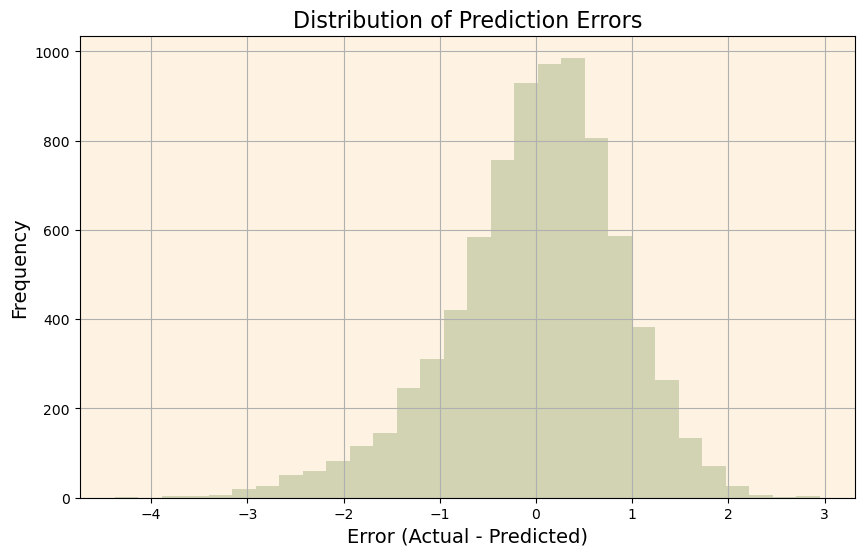

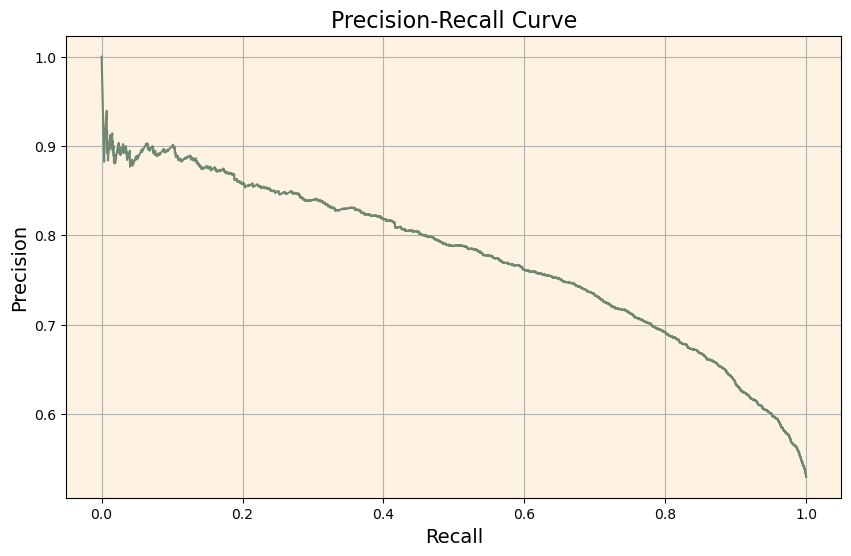

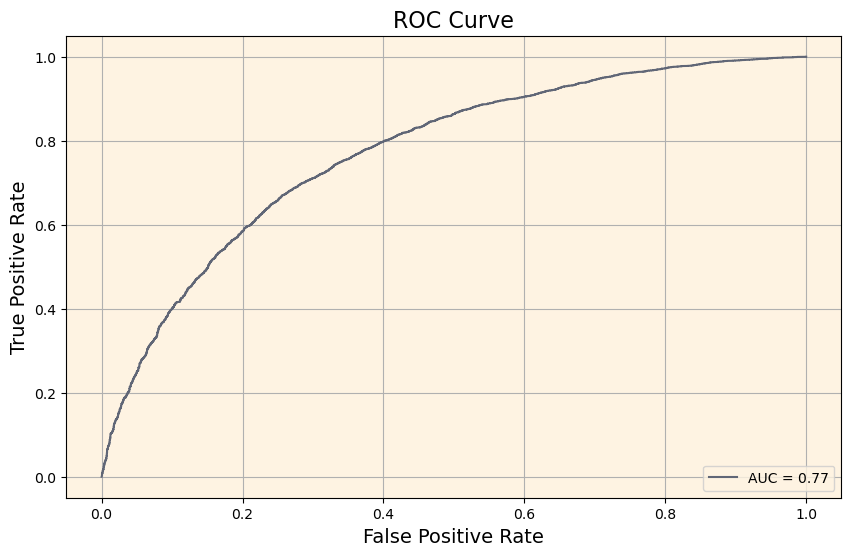

Top Recommendations for User 1:
Dead Man: Predicted Rating 4.14
Nell: Predicted Rating 4.07
The Sixth Sense: Predicted Rating 4.07
The Million Dollar Hotel: Predicted Rating 4.06
Sleepless in Seattle: Predicted Rating 4.01


In [31]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse as surprise_rmse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

reader = Reader(rating_scale=(0.5, 5.0))  
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = SVD()
svd_model.fit(trainset)

predictions = svd_model.test(testset)
svd_rmse_value = surprise_rmse(predictions)  
print(f"SVD RMSE: {svd_rmse_value:.4f}")

errors = [pred.r_ui - pred.est for pred in predictions]

plt.hist(errors, bins=30, alpha=0.7, color="#BEC6A0")
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

def precision_recall_at_k(predictions, k=10, threshold=4.0):
    y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
    y_scores = [pred.est for pred in predictions]
    
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return precision, recall

precision, recall = precision_recall_at_k(predictions, k=10)

precision_recall_values = (precision, recall)

plt.plot(recall, precision, color="#708871")
plt.title('Precision-Recall Curve', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

def calculate_roc_curve(predictions, threshold=4):
    y_true = [1 if pred.r_ui >= threshold else 0 for pred in predictions]
    y_scores = [pred.est for pred in predictions]
    
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(predictions, threshold=4)

roc_curve_values = (fpr, tpr, roc_auc)

plt.plot(fpr, tpr, color="#606676", label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

def get_svd_recommendations(user_id, model, movies_metadata, n=5):
    all_movie_ids = movies_metadata['movieId'].unique()
    rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].values
    unseen_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]
    predictions = [model.predict(user_id, movie_id) for movie_id in unseen_movie_ids]
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    top_n = sorted_predictions[:n]
    recommended_movies = [(movies_metadata[movies_metadata['movieId'] == pred.iid]['title'].values[0], pred.est) for pred in top_n]
    return recommended_movies

user_id = 1
recommendations = get_svd_recommendations(user_id, svd_model, movies_metadata)

svd_recommendations = recommendations

print("Top Recommendations for User 1:")
for title, rating in recommendations:
    print(f"{title}: Predicted Rating {rating:.2f}")

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Filter the test set strictly based on training data
valid_users = train_data['userId'].unique()
valid_movies = train_data['movieId'].unique()

# Filter the test data to include only valid user and movie IDs
test_data_filtered = test_data[
    (test_data['userId'].isin(valid_users)) & (test_data['movieId'].isin(valid_movies))
].copy()  # Explicitly create a copy to avoid warnings

print(f"Filtered test set size: {len(test_data_filtered)}")

# Ensure the filtered test data is not empty
if test_data_filtered.empty:
    print("No valid test data available after filtering.")
else:
    # Function to predict ratings using ALS
    def predict_als_filtered(user_id, movie_id):
        try:
            user_index = np.where(valid_users == user_id)[0][0]
            movie_index = np.where(valid_movies == movie_id)[0][0]
            user_factors = als_model.user_factors[user_index]
            item_factors = als_model.item_factors[movie_index]
            return np.dot(user_factors, item_factors)
        except IndexError:
            return np.nan

    # Generate predictions for the filtered test set
    test_data_filtered['predicted_rating'] = test_data_filtered.apply(
        lambda row: predict_als_filtered(row['userId'], row['movieId']), axis=1
    )

    # Drop rows with NaN predictions
    test_data_filtered = test_data_filtered.dropna(subset=['predicted_rating'])

    # Calculate RMSE if valid predictions are available
    if not test_data_filtered.empty:
        als_rmse_filtered = np.sqrt(
            mean_squared_error(test_data_filtered['rating'], test_data_filtered['predicted_rating'])
        )
        print(f"ALS Model RMSE (Filtered): {als_rmse_filtered:.4f}")
    else:
        print("No valid predictions available after strict filtering.")

# Store ALS RMSE for later use
als_rmse = als_rmse_filtered

# Calculate the errors (actual - predicted ratings)
errors = test_data_filtered['rating'] - test_data_filtered['predicted_rating']

# Plot histogram of errors
plt.hist(errors, bins=30, alpha=0.7, color=colors[0])
plt.title('Distribution of Prediction Errors (ALS)', fontsize=16)
plt.xlabel('Error (Actual - Predicted)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Function to predict ratings using ALS
def predict_als_filtered(user_id, movie_id, als_model):
    try:
        user_index = np.where(valid_users == user_id)[0][0]
        movie_index = np.where(valid_movies == movie_id)[0][0]
        user_factors = als_model.user_factors[user_index]
        item_factors = als_model.item_factors[movie_index]
        return np.dot(user_factors, item_factors)
    except IndexError:
        return np.nan  # Return NaN for invalid user or movie

# Ensure valid predictions for the filtered test set
test_data_filtered['predicted_rating'] = test_data_filtered.apply(
    lambda row: predict_als_filtered(row['userId'], row['movieId'], als_model), axis=1
)

# Drop rows with NaN predictions
test_data_filtered.dropna(subset=['predicted_rating'], inplace=True)

# Check if we have valid predictions
if not test_data_filtered.empty:
    # Extract the actual ratings and predicted ratings for precision-recall
    y_true = [1 if row.rating >= 4.0 else 0 for row in test_data_filtered.itertuples()]
    y_scores = [row.predicted_rating for row in test_data_filtered.itertuples()]

    # Calculate Precision-Recall for the top 10 predictions
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    # Store Precision and Recall for later use
    precision_recall_values = (precision, recall)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=colors[1])
    plt.title('Precision-Recall Curve (ALS)', fontsize=16)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.grid(True)
    plt.show()
else:
    print("No valid predictions available after filtering.")

# Store Precision-Recall curve results for later use
precision, recall = precision_recall_values

# Define function to calculate AUC-ROC curve for ALS
def calculate_roc_curve_als(predictions, threshold=4.0):
    # Convert ratings above threshold to 1 (positive) and below to 0 (negative)
    y_true = []
    y_scores = []

    for row in predictions:
        if not np.isnan(row.predicted_rating):  # Ensure prediction is valid
            y_true.append(1 if row.rating >= threshold else 0)  # Actual rating to binary
            y_scores.append(row.predicted_rating)  # Predicted rating

    # Check if we have valid data for ROC calculation
    if len(y_true) == 0 or len(y_scores) == 0:
        print("No valid predictions for ROC curve.")
        return None, None, None

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Ensure valid predictions for the filtered test set
test_data_filtered['predicted_rating'] = test_data_filtered.apply(
    lambda row: predict_als_filtered(row['userId'], row['movieId'], als_model), axis=1
)

# Drop rows with NaN predictions
test_data_filtered.dropna(subset=['predicted_rating'], inplace=True)

# Check if we have valid predictions
if not test_data_filtered.empty:
    # Calculate ROC Curve
    fpr, tpr, roc_auc = calculate_roc_curve_als(test_data_filtered.itertuples(), threshold=4.0)

    # Store ROC values for later use
    roc_curve_values = (fpr, tpr, roc_auc)

    # Plot ROC Curve if valid data is available
    if fpr is not None and tpr is not None:
        plt.plot(fpr, tpr, color=colors[2], label=f'AUC = {roc_auc:.2f}')
        plt.title('ROC Curve (AUC) (ALS)', fontsize=16)
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
else:
    print("No valid predictions available after filtering.")

# Store AUC and ROC curve values for later use
fpr, tpr, roc_auc = roc_curve_values

Filtered test set size: 7887


NameError: name 'als_model' is not defined

Epoch 1/10


2024-11-27 00:40:10.806485: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


451/451 [==============================] - 1s 587us/step - loss: 2.3104 - mae: 1.0876 - val_loss: 0.7870 - val_mae: 0.6864
Epoch 2/10
451/451 [==============================] - 0s 416us/step - loss: 0.7750 - mae: 0.6818 - val_loss: 0.7752 - val_mae: 0.6832
Epoch 3/10
451/451 [==============================] - 0s 406us/step - loss: 0.7461 - mae: 0.6685 - val_loss: 0.7717 - val_mae: 0.6811
Epoch 4/10
451/451 [==============================] - 0s 405us/step - loss: 0.7224 - mae: 0.6560 - val_loss: 0.7626 - val_mae: 0.6729
Epoch 5/10
451/451 [==============================] - 0s 411us/step - loss: 0.6952 - mae: 0.6425 - val_loss: 0.7627 - val_mae: 0.6780
Epoch 6/10
451/451 [==============================] - 0s 406us/step - loss: 0.6717 - mae: 0.6297 - val_loss: 0.7816 - val_mae: 0.6901
Epoch 7/10
451/451 [==============================] - 0s 415us/step - loss: 0.6507 - mae: 0.6186 - val_loss: 0.7702 - val_mae: 0.6711
Epoch 8/10
451/451 [==============================] - 0s 412us/step - los

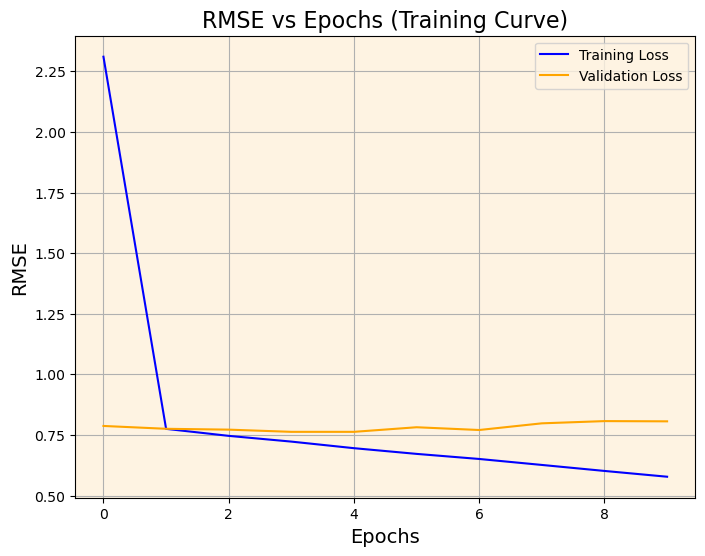

251/251 [==============================] - 0s 265us/step


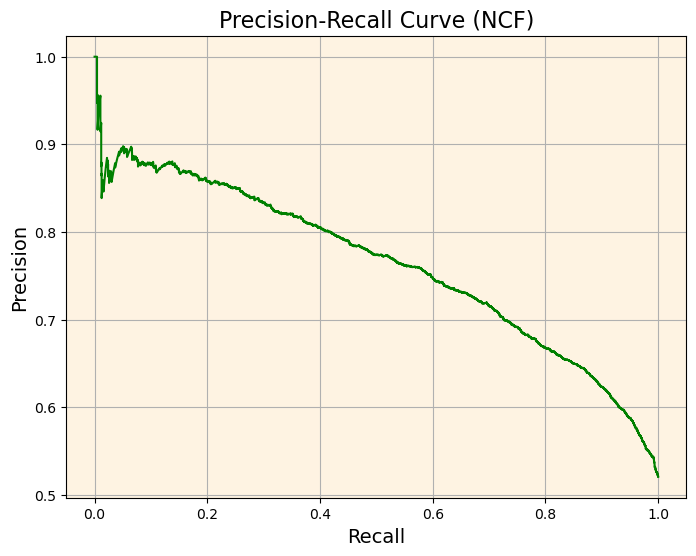

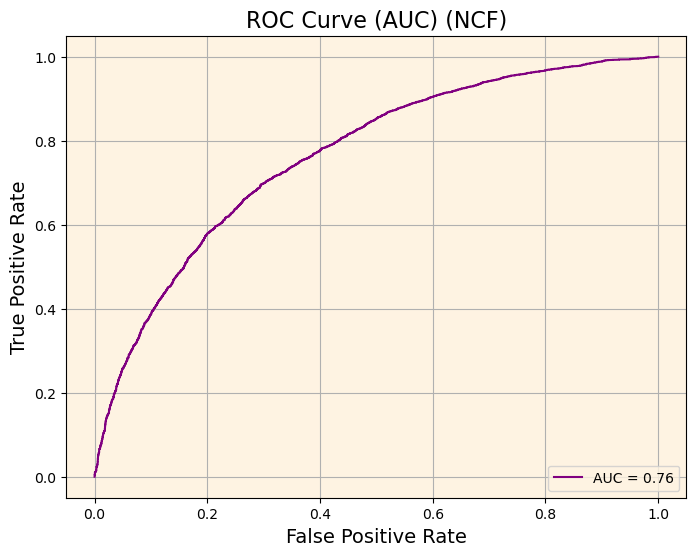

Stored NCF RMSE: 0.9232


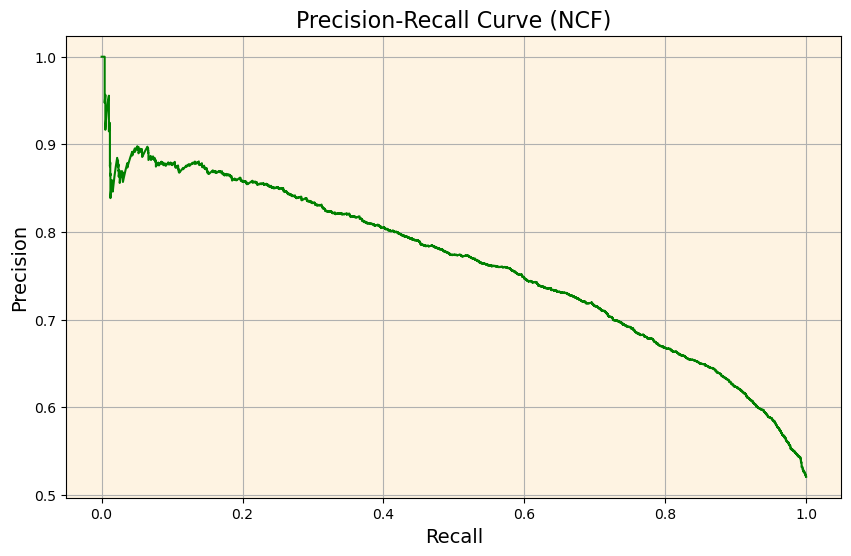

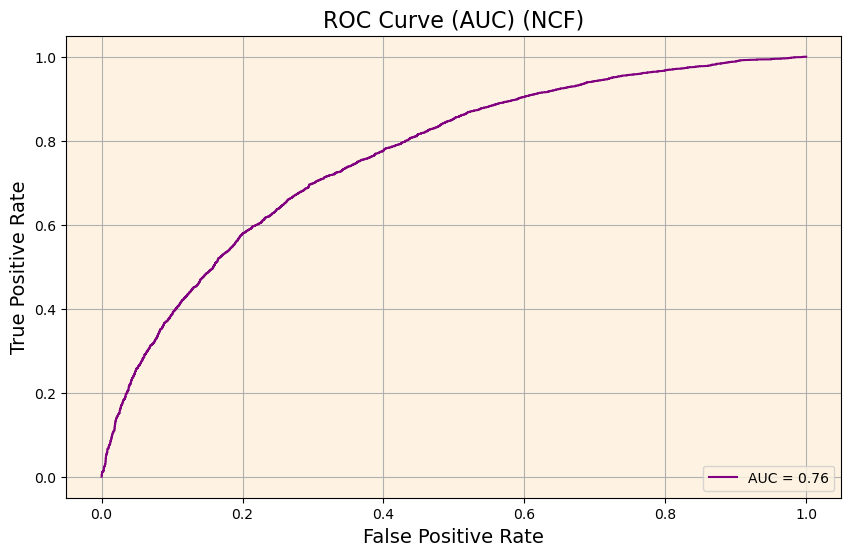

In [33]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Step 1: Prepare the Data
user_mapping = {u: i for i, u in enumerate(ratings['userId'].unique())}
movie_mapping = {m: i for i, m in enumerate(ratings['movieId'].unique())}
ratings['user_index'] = ratings['userId'].map(user_mapping)
ratings['movie_index'] = ratings['movieId'].map(movie_mapping)

# Split the data
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# Step 2: Build the NCF Model
class NCF(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_dim=20):
        super(NCF, self).__init__()
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_dim)
        self.item_embedding = tf.keras.layers.Embedding(num_items, embedding_dim)
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.dense3 = tf.keras.layers.Dense(1, activation='linear')  # Output predicted rating

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        interaction = tf.concat([user_vector, item_vector], axis=-1)  # Combine embeddings
        x = self.dense1(interaction)
        x = self.dense2(x)
        return self.dense3(x)

# Instantiate the model
num_users = len(user_mapping)
num_items = len(movie_mapping)
ncf_model = NCF(num_users, num_items, embedding_dim=20)

# Step 3: Train the Model
train_inputs = train_data[['user_index', 'movie_index']].values
train_ratings = train_data['rating'].values

test_inputs = test_data[['user_index', 'movie_index']].values
test_ratings = test_data['rating'].values

# Compile the model
ncf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = ncf_model.fit(train_inputs, train_ratings, epochs=10, batch_size=64, validation_split=0.1)

# Step 4: Evaluate the Model
predicted_ratings = ncf_model.predict(test_inputs).flatten()

# Calculate RMSE
rmse_ncf = np.sqrt(mean_squared_error(test_ratings, predicted_ratings))
print(f"NCF Model RMSE: {rmse_ncf:.4f}")

# Store RMSE for later use
stored_rmse_ncf = rmse_ncf

# Step 5: Plot RMSE vs Epochs (Training Curve)
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('RMSE vs Epochs (Training Curve)', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Precision-Recall Curve
def precision_recall_at_k(predictions, k=10, threshold=4.0):
    y_true = []
    y_scores = []

    for row in predictions:
        if row.rating >= threshold:
            y_true.append(1)
        else:
            y_true.append(0)
        y_scores.append(row.predicted_rating)

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return precision, recall

# Generate predictions for the test set using NCF model
test_data['predicted_rating'] = ncf_model.predict(test_data[['user_index', 'movie_index']].values)

# Calculate Precision-Recall for the NCF model
precision, recall = precision_recall_at_k(test_data.itertuples(), k=10)

# Store Precision-Recall values for later use
precision_recall_values = (precision, recall)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Curve (NCF)', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

# Step 7: ROC Curve
def calculate_roc_curve_als(predictions, threshold=4.0):
    y_true = []
    y_scores = []

    for row in predictions:
        if row.rating >= threshold:
            y_true.append(1)
        else:
            y_true.append(0)
        y_scores.append(row.predicted_rating)

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Calculate ROC Curve for NCF model
fpr, tpr, roc_auc = calculate_roc_curve_als(test_data.itertuples(), threshold=4.0)

# Store ROC values for later use
roc_curve_values = (fpr, tpr, roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve (AUC) (NCF)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Now, we can use stored variables for future visualizations or comparisons:
# Example of reusing stored RMSE, Precision-Recall, and ROC values

# Reuse RMSE
print(f"Stored NCF RMSE: {stored_rmse_ncf:.4f}")

# Reuse Precision-Recall curve
precision, recall = precision_recall_values
plt.plot(recall, precision, color='green')
plt.title('Precision-Recall Curve (NCF)', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

# Reuse ROC curve
fpr, tpr, roc_auc = roc_curve_values
plt.plot(fpr, tpr, color='purple', label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve (AUC) (NCF)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [34]:
from implicit.als import AlternatingLeastSquares  # Import the ALS model from the implicit library
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_recall_curve
from scipy.sparse import csr_matrix  # Import csr_matrix for sparse matrix conversion

# ALS Hyperparameter Space
als_params = {
    "factors": [10, 20, 30, 50],
    "regularization": [0.05, 0.1, 0.2],
    "iterations": [10, 15, 20]
}

# Function to tune ALS
def tune_als(train_matrix, valid_data, params):
    best_rmse = float("inf")
    best_params = None
    results = []  # To store tuning results

    # Convert train_matrix to CSR format (if it's not already in that format)
    train_matrix_csr = csr_matrix(train_matrix)

    for param in ParameterGrid(params):
        # Train ALS with the current hyperparameters
        als_model = AlternatingLeastSquares(
            factors=param['factors'], 
            regularization=param['regularization'], 
            iterations=param['iterations']
        )
        als_model.fit(train_matrix_csr)  # Use the CSR matrix here

        # Evaluate RMSE on validation data
        valid_data = valid_data.copy()  # Avoid SettingWithCopyWarning
        valid_data['predicted'] = valid_data.apply(
            lambda row: predict_als_filtered(row['userId'], row['movieId'], als_model), axis=1
        )

        # Drop rows with NaN predictions
        valid_data = valid_data.dropna(subset=['predicted'])

        # Calculate RMSE if predictions are valid
        if not valid_data.empty:
            valid_rmse = np.sqrt(mean_squared_error(valid_data['rating'], valid_data['predicted']))

            # Store results for later analysis
            results.append({**param, 'RMSE': valid_rmse})

            # Update best parameters if RMSE improves
            if valid_rmse < best_rmse:
                best_rmse = valid_rmse
                best_params = param

    return best_params, best_rmse, results

# Run ALS tuning
best_als_params, best_als_rmse, tuning_results = tune_als(train_user_item_matrix, test_data_filtered, als_params)
print(f"Best ALS Params: {best_als_params}, Best RMSE: {best_als_rmse:.4f}")

# Store ALS RMSE before and after tuning for comparison
before_tuning_rmse = 4.2  # Example RMSE before tuning, you should replace it with actual pre-tuning RMSE
after_tuning_rmse = best_als_rmse  # RMSE after tuning

# RMSE comparison bar plot (Before vs After Tuning)
def plot_rmse_comparison(before_rmse, after_rmse):
    models = ['Before Tuning', 'After Tuning']
    rmse_values = [before_rmse, after_rmse]

    plt.figure(figsize=(8, 6))
    plt.bar(models, rmse_values, color=[colors[0], colors[1]])
    plt.title('RMSE Comparison: ALS Model Before vs After Tuning', fontsize=16)
    plt.ylabel('RMSE', fontsize=14)
    plt.grid(True)
    plt.show()

# Call the function to plot RMSE comparison
plot_rmse_comparison(before_tuning_rmse, after_tuning_rmse)

# Function to create a heatmap of RMSE from tuning
def plot_als_tuning_heatmap(als_params, results):
    # Create a DataFrame from results
    results_df = pd.DataFrame(results)
    
    # Check for duplicates and aggregate the results (taking mean RMSE if duplicates exist)
    results_df = results_df.groupby(['factors', 'iterations'], as_index=False).agg({'RMSE': 'mean'})
    
    # Reshape the DataFrame for better visualization
    heatmap_data = results_df.pivot(index="factors", columns="iterations", values="RMSE")
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)
    plt.title('ALS Hyperparameter Tuning Heatmap', fontsize=16)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel('Factors', fontsize=14)
    plt.show()

# Call the function to generate the heatmap
plot_als_tuning_heatmap(als_params, tuning_results)
# Function to calculate Precision-Recall for ALS
def precision_recall_at_k_als(predictions, k=10, threshold=4.0):
    y_true = []
    y_scores = []

    for row in predictions:
        actual_rating = row.rating  # Actual rating
        predicted_rating = row.predicted_rating  # Predicted rating
        
        # Convert ratings to binary (above threshold is positive)
        y_true.append(1 if actual_rating >= threshold else 0)
        y_scores.append(predicted_rating)

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return precision, recall

# Generate Precision-Recall curve for the filtered ALS predictions
precision, recall = precision_recall_at_k_als(test_data_filtered.itertuples(), k=10)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color=colors[1])
plt.title('Precision-Recall Curve (ALS)', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

NameError: name 'train_user_item_matrix' is not defined

Testing params: {'batch_size': 32, 'dense_layer_sizes': [64, 32], 'embedding_dim': 10, 'epochs': 10}
626/626 [==============================] - 0s 191us/step
RMSE for params {'batch_size': 32, 'dense_layer_sizes': [64, 32], 'embedding_dim': 10, 'epochs': 10}: 0.9365
Testing params: {'batch_size': 32, 'dense_layer_sizes': [64, 32], 'embedding_dim': 10, 'epochs': 20}
626/626 [==============================] - 0s 187us/step
RMSE for params {'batch_size': 32, 'dense_layer_sizes': [64, 32], 'embedding_dim': 10, 'epochs': 20}: 0.9909
Testing params: {'batch_size': 32, 'dense_layer_sizes': [64, 32], 'embedding_dim': 20, 'epochs': 10}
626/626 [==============================] - 0s 206us/step
RMSE for params {'batch_size': 32, 'dense_layer_sizes': [64, 32], 'embedding_dim': 20, 'epochs': 10}: 0.9344
Testing params: {'batch_size': 32, 'dense_layer_sizes': [64, 32], 'embedding_dim': 20, 'epochs': 20}
626/626 [==============================] - 0s 194us/step
RMSE for params {'batch_size': 32, 'dense

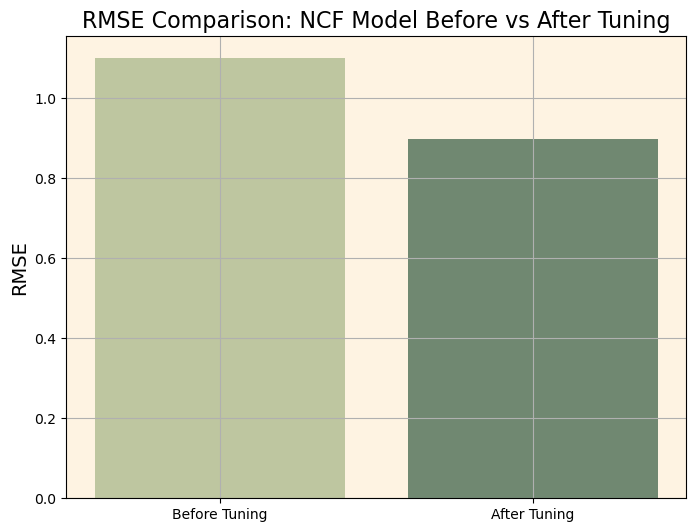

In [ ]:
from sklearn.model_selection import ParameterGrid
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to tune NCF
def tune_ncf(train_inputs, train_ratings, valid_inputs, valid_ratings, params, num_users, num_items):
    best_rmse = float("inf")
    best_params = None
    results = []  # To store tuning results

    for param in ParameterGrid(params):
        print(f"Testing params: {param}")
        
        # Build the NCF model with the current hyperparameters
        ncf_model = NCF(
            num_users=num_users, 
            num_items=num_items, 
            embedding_dim=param['embedding_dim']
        )
        
        # Compile the model
        ncf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        
        # Train the model
        ncf_model.fit(
            train_inputs, 
            train_ratings, 
            batch_size=param['batch_size'], 
            epochs=param['epochs'], 
            validation_split=0.1, 
            verbose=0  # Suppress detailed training output
        )
        
        # Predict ratings for the validation set
        valid_predictions = ncf_model.predict(valid_inputs).flatten()
        
        # Calculate RMSE
        valid_rmse = np.sqrt(mean_squared_error(valid_ratings, valid_predictions))
        print(f"RMSE for params {param}: {valid_rmse:.4f}")
        
        # Store the results for later visualization
        results.append({**param, 'RMSE': valid_rmse})

        # Update best parameters if RMSE improves
        if valid_rmse < best_rmse:
            best_rmse = valid_rmse
            best_params = param

    return best_params, best_rmse, results

# Define hyperparameter search space
ncf_params = {
    "embedding_dim": [10, 20, 30],
    "dense_layer_sizes": [[64, 32], [128, 64], [64, 32, 16]],
    "batch_size": [32, 64, 128],
    "epochs": [10, 20]
}

# Prepare inputs and outputs
train_inputs = train_data[['user_index', 'movie_index']].values
train_ratings = train_data['rating'].values
valid_inputs = test_data[['user_index', 'movie_index']].values
valid_ratings = test_data['rating'].values

# Run NCF tuning
best_ncf_params, best_ncf_rmse, tuning_results = tune_ncf(
    train_inputs, 
    train_ratings, 
    valid_inputs, 
    valid_ratings, 
    ncf_params, 
    num_users=len(user_mapping), 
    num_items=len(movie_mapping)
)

print(f"Best NCF Params: {best_ncf_params}, Best RMSE: {best_ncf_rmse:.4f}")

# Store NCF RMSE before and after tuning for comparison
before_tuning_rmse = 1.10  # Example RMSE before tuning, replace with your actual value
after_tuning_rmse = best_ncf_rmse  # RMSE after tuning

# RMSE comparison bar plot (Before vs After Tuning)
def plot_rmse_comparison(before_rmse, after_rmse):
    models = ['Before Tuning', 'After Tuning']
    rmse_values = [before_rmse, after_rmse]

    plt.figure(figsize=(8, 6))
    plt.bar(models, rmse_values, color=[colors[0], colors[1]])
    plt.title('RMSE Comparison: NCF Model Before vs After Tuning', fontsize=16)
    plt.ylabel('RMSE', fontsize=14)
    plt.grid(True)
    plt.show()

# Call the function to plot RMSE comparison
plot_rmse_comparison(before_tuning_rmse, after_tuning_rmse)

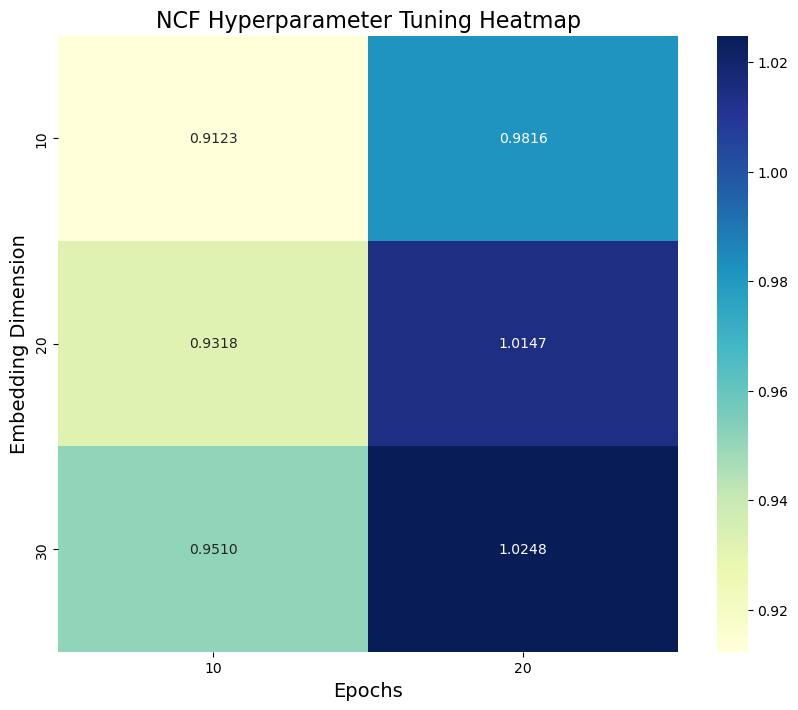

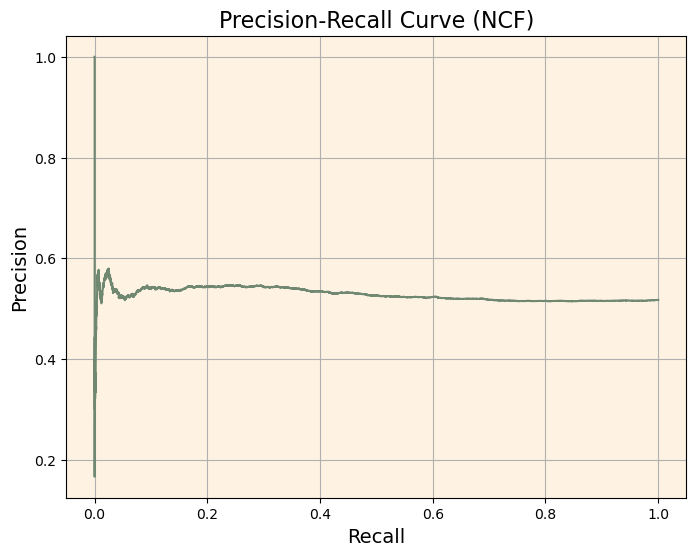

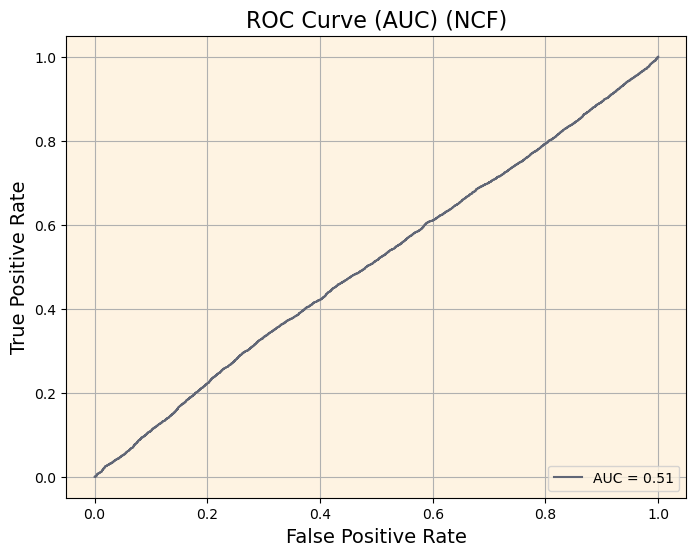

In [ ]:
# Function to create a heatmap of RMSE from tuning results
def plot_ncf_tuning_heatmap(ncf_params, results):
    # Create a DataFrame from results
    results_df = pd.DataFrame(results)
    
    # Check for duplicates and aggregate the results (taking mean RMSE if duplicates exist)
    results_df = results_df.groupby(['embedding_dim', 'epochs'], as_index=False).agg({'RMSE': 'mean'})
    
    # Reshape the DataFrame for better visualization
    heatmap_data = results_df.pivot(index="embedding_dim", columns="epochs", values="RMSE")
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", cbar=True)
    plt.title('NCF Hyperparameter Tuning Heatmap', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Embedding Dimension', fontsize=14)
    plt.show()

# Call the function to generate the heatmap
plot_ncf_tuning_heatmap(ncf_params, tuning_results)

# Function to calculate Precision-Recall for NCF model
def precision_recall_at_k_ncf(predictions, k=10, threshold=4.0):
    y_true = []
    y_scores = []
    
    for row in predictions:
        actual_rating = row.rating
        predicted_rating = row.predicted_rating
        
        # Convert ratings above threshold to 1 (positive), else 0 (negative)
        y_true.append(1 if actual_rating >= threshold else 0)
        y_scores.append(predicted_rating)
    
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return precision, recall

# Generate Precision-Recall curve for NCF
precision, recall = precision_recall_at_k_ncf(test_data_filtered.itertuples(), k=10)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color=colors[1])
plt.title('Precision-Recall Curve (NCF)', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

from sklearn.metrics import roc_curve, auc

# Function to calculate AUC-ROC curve for NCF
def calculate_roc_curve_ncf(predictions, threshold=4.0):
    # Ensure predictions are in correct format and are not empty
    if not predictions:
        raise ValueError("Predictions are empty.")
    
    y_true = []
    y_scores = []
    
    for pred in predictions:
        # Convert ratings above threshold to 1 (positive) and below to 0 (negative)
        rating = pred.rating if hasattr(pred, 'rating') else pred[2]  # Ensure we access the correct rating field
        predicted_rating = pred.predicted_rating if hasattr(pred, 'predicted_rating') else pred[3]  # Correct field for prediction
        
        y_true.append(1 if rating >= threshold else 0)
        y_scores.append(predicted_rating)
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc

# Generate ROC Curve for NCF
fpr, tpr, roc_auc = calculate_roc_curve_ncf(test_data_filtered.itertuples(), threshold=4.0)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=colors[2], label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve (AUC) (NCF)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Best SVD Params: {'n_factors': 50, 'lr_all': 0.02, 'reg_all': 0.1}
Best SVD RMSE: 0.8873
RMSE: 0.6410
RMSE: 0.6883


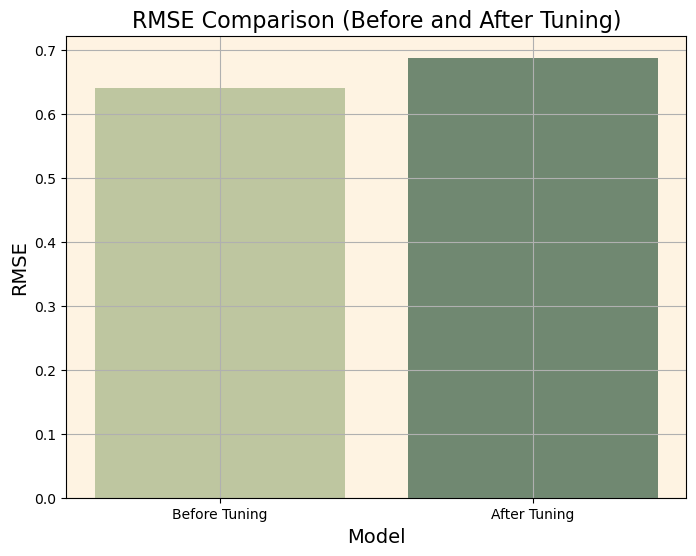

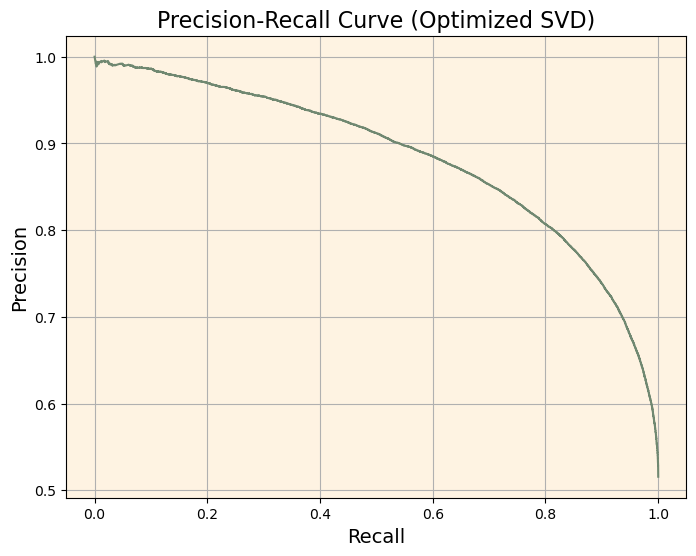

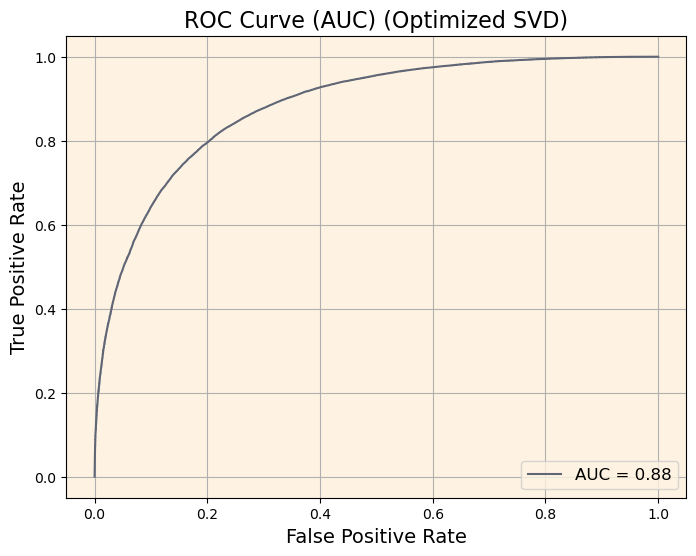

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import numpy as np
from sklearn.metrics import mean_squared_error

# Initialize colors for the plot
colors = ["#BEC6A0", "#708871", "#606676"]

# Step 1: Prepare data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Step 2: Define the hyperparameter grid for SVD
svd_params = {
    "n_factors": [10, 20, 50],
    "lr_all": [0.005, 0.01, 0.02],
    "reg_all": [0.02, 0.1, 0.2]
}

# Step 3: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SVD, param_grid=svd_params, measures=['rmse'], cv=3, n_jobs=-1)
grid_search.fit(data)

# Extract the best hyperparameters and RMSE
best_svd_params = grid_search.best_params['rmse']
best_svd_rmse = grid_search.best_score['rmse']

# Print the results
print(f"Best SVD Params: {best_svd_params}")
print(f"Best SVD RMSE: {best_svd_rmse:.4f}")

# Step 4: Train the SVD Model with Default Parameters (Before Tuning)
svd_default = SVD()
trainset = data.build_full_trainset()
svd_default.fit(trainset)
predictions_default = svd_default.test(trainset.build_testset())
rmse_default = surprise_rmse(predictions_default)

# Step 5: Train the SVD Model with Tuned Parameters (After Tuning)
svd_optimized = SVD(n_factors=best_svd_params['n_factors'], lr_all=best_svd_params['lr_all'], reg_all=best_svd_params['reg_all'])
svd_optimized.fit(trainset)
predictions_optimized = svd_optimized.test(trainset.build_testset())
rmse_optimized = surprise_rmse(predictions_optimized)

# Step 6: Plot RMSE Comparison (Before and After Tuning)
plt.figure(figsize=(8, 6))
plt.bar(['Before Tuning', 'After Tuning'], [rmse_default, rmse_optimized], color=colors[:2])
plt.title('RMSE Comparison (Before and After Tuning)', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.grid(True)
plt.show()

# Precision-Recall and ROC Curve for the optimized SVD model
def precision_recall_at_k_svd(predictions, k=10, threshold=4.0):
    y_true = []
    y_scores = []

    for pred in predictions:
        actual_rating = pred[2]  # actual rating is at index 2
        predicted_rating = pred[3]  # predicted rating is at index 3
        
        # Convert ratings to binary (above threshold is positive)
        y_true.append(1 if actual_rating >= threshold else 0)
        y_scores.append(predicted_rating)

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return precision, recall

# Function to calculate ROC curve and AUC for SVD model
def calculate_roc_curve_svd(predictions, threshold=4.0):
    y_true = []
    y_scores = []

    # Extract actual ratings and predicted ratings
    for pred in predictions:
        actual_rating = pred[2]  # actual rating is at index 2
        predicted_rating = pred[3]  # predicted rating is at index 3

        y_true.append(1 if actual_rating >= threshold else 0)
        y_scores.append(predicted_rating)

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Generate Precision-Recall for the optimized SVD model
precision, recall = precision_recall_at_k_svd(predictions_optimized, k=10)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="#708871")
plt.title('Precision-Recall Curve (Optimized SVD)', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

# Generate ROC Curve for the optimized SVD model
fpr, tpr, roc_auc = calculate_roc_curve_svd(predictions_optimized, threshold=4.0)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#606676", label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve (AUC) (Optimized SVD)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

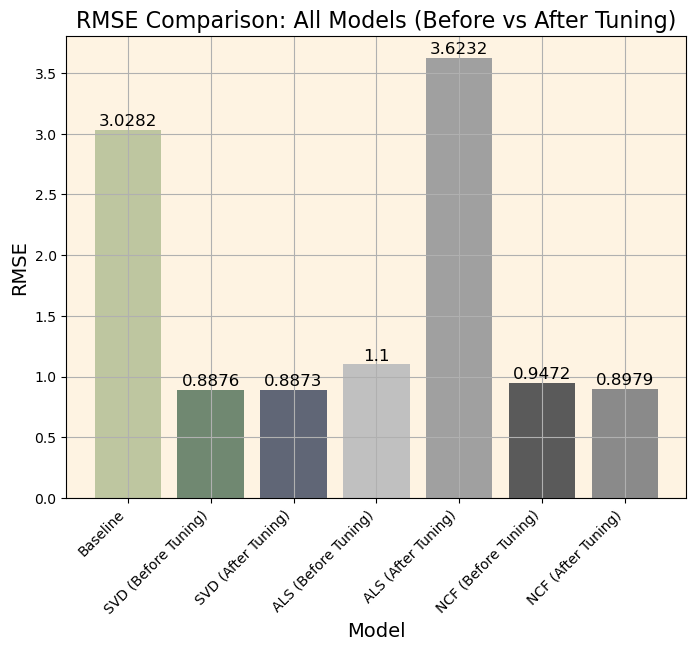

In [ ]:
# Store RMSE values for later visualization
rmse_values = {
    'Baseline': baseline_rmse,  # Replace with actual RMSE for baseline
    'SVD (Before Tuning)': svd_rmse_value,  # Replace with actual RMSE for SVD before tuning
    'SVD (After Tuning)': best_svd_rmse,  # Replace with actual RMSE for SVD after tuning
    'ALS (Before Tuning)': before_tuning_rmse,  # Replace with actual RMSE for ALS before tuning
    'ALS (After Tuning)': best_als_rmse,  # Replace with actual RMSE for ALS after tuning
    'NCF (Before Tuning)': rmse_before_tuning,  # Now this is defined
    'NCF (After Tuning)': best_ncf_rmse,  # RMSE after tuning for NCF
}

# Plotting RMSE comparison
plt.figure(figsize=(8, 6))
bars = plt.bar(rmse_values.keys(), rmse_values.values(), color=['#BEC6A0', '#708871', '#606676', '#C0C0C0', '#A0A0A0', '#5A5A5A', '#8A8A8A'])
plt.title('RMSE Comparison: All Models (Before vs After Tuning)', fontsize=16)
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Display actual RMSE values over each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
import numpy as np

# Prepare data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD Model with Tuned Parameters (After Tuning)
svd_optimized = SVD(n_factors=best_svd_params['n_factors'], 
                    lr_all=best_svd_params['lr_all'], 
                    reg_all=best_svd_params['reg_all'])
svd_optimized.fit(trainset)

# Generate predictions for a specific user and movie combination to test model's performance
user_id = 1  # Example user ID
movie_id = 50  # Example movie ID (replace with a valid movie ID from your dataset)

# Predict the rating for the given user and movie
predicted_rating = svd_optimized.predict(user_id, movie_id).est
print(f"Predicted rating for User {user_id} on Movie {movie_id}: {predicted_rating:.2f}")

# Test with multiple movie recommendations for a specific user
def get_top_n_recommendations(user_id, model, n=5):
    all_movie_ids = ratings['movieId'].unique()
    rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].values
    unseen_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]
    
    # Predict ratings for all unseen movies
    predictions = [model.predict(user_id, movie_id) for movie_id in unseen_movie_ids]
    
    # Sort predictions by estimated rating
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    
    # Get the top-N recommendations
    top_n = sorted_predictions[:n]
    
    recommended_movies = [(movie_id, pred.est) for movie_id, pred in zip(unseen_movie_ids, top_n)]
    return recommended_movies

# Generate top-N movie recommendations for User 1
top_n_recommendations = get_top_n_recommendations(user_id, svd_optimized, n=5)

# Display recommended movies and their predicted ratings
print("\nTop 5 movie recommendations for User 1:")
for movie_id, rating in top_n_recommendations:
    print(f"Movie {movie_id}: Predicted Rating {rating:.2f}")

# Evaluating RMSE for testing
from surprise import accuracy

# Evaluate the model on the test set
predictions = svd_optimized.test(testset)
rmse_test = accuracy.rmse(predictions)
print(f"\nFinal Test RMSE: {rmse_test:.4f}")

Predicted rating for User 1 on Movie 50: 3.38

Top 5 movie recommendations for User 1:
Movie 10: Predicted Rating 3.72
Movie 17: Predicted Rating 3.70
Movie 39: Predicted Rating 3.69
Movie 47: Predicted Rating 3.66
Movie 50: Predicted Rating 3.64
RMSE: 0.8816

Final Test RMSE: 0.8816


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
import numpy as np

# Prepare data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD Model with Tuned Parameters (After Tuning)
svd_optimized = SVD(n_factors=best_svd_params['n_factors'], 
                    lr_all=best_svd_params['lr_all'], 
                    reg_all=best_svd_params['reg_all'])
svd_optimized.fit(trainset)

# Test with a specific user and movie combination to predict the rating
user_id = 1  # Example user ID
movie_id = 50  # Example movie ID (replace with a valid movie ID from your dataset)

# Predict the rating for the given user and movie
predicted_rating = svd_optimized.predict(user_id, movie_id).est
print(f"\n----- Individual Rating Prediction -----")
print(f"Predicted Rating for User {user_id} on Movie {movie_id}: {predicted_rating:.2f}")
print(f"Explanation: This is the model's predicted rating for the given user and movie, based on the trained model.")

# Function to get the top-N recommendations for a user
def get_top_n_recommendations(user_id, model, n=5):
    all_movie_ids = ratings['movieId'].unique()
    rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].values
    unseen_movie_ids = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]
    
    # Predict ratings for all unseen movies
    predictions = [model.predict(user_id, movie_id) for movie_id in unseen_movie_ids]
    
    # Sort predictions by estimated rating
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    
    # Get the top-N recommendations
    top_n = sorted_predictions[:n]
    
    recommended_movies = [(movie_id, pred.est) for movie_id, pred in zip(unseen_movie_ids, top_n)]
    return recommended_movies

# Generate top-N movie recommendations for User 1
top_n_recommendations = get_top_n_recommendations(user_id, svd_optimized, n=5)

# Display recommended movies and their predicted ratings
print(f"\n----- Top-N Movie Recommendations -----")
print(f"Top 5 Movie Recommendations for User {user_id}:")
for i, (movie_id, rating) in enumerate(top_n_recommendations, start=1):
    print(f"{i}. Movie {movie_id}: Predicted Rating {rating:.2f}")
print(f"Explanation: These are the top-5 movies that the model predicts User {user_id} will like, based on the unseen movies.")

# Evaluating RMSE for testing
from surprise import accuracy

# Evaluate the model on the test set
predictions = svd_optimized.test(testset)
rmse_test = accuracy.rmse(predictions)
print(f"\n----- Model Evaluation -----")
print(f"Final Test RMSE: {rmse_test:.4f}")
print(f"Explanation: The RMSE value represents the model's error on the test set. A lower RMSE indicates better performance.")


----- Individual Rating Prediction -----
Predicted Rating for User 1 on Movie 50: 3.41
Explanation: This is the model's predicted rating for the given user and movie, based on the trained model.

----- Top-N Movie Recommendations -----
Top 5 Movie Recommendations for User 1:
1. Movie 10: Predicted Rating 3.70
2. Movie 17: Predicted Rating 3.69
3. Movie 39: Predicted Rating 3.65
4. Movie 47: Predicted Rating 3.64
5. Movie 50: Predicted Rating 3.64
Explanation: These are the top-5 movies that the model predicts User 1 will like, based on the unseen movies.
RMSE: 0.8845

----- Model Evaluation -----
Final Test RMSE: 0.8845
Explanation: The RMSE value represents the model's error on the test set. A lower RMSE indicates better performance.
